In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
model=keras.Sequential([])

In [7]:
model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu',padding='same',input_shape=(28,28,1)))


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [9]:
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Flatten())


In [10]:
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Dense(10,activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 32)          9

In [13]:
model.compile(optimizer='adam',loss='categorical_crossentropy',
            metrics=['accuracy'])

In [31]:
train_img=np.reshape(train_images,[-1,28,28,1])
test_img=np.reshape(test_images,[-1,28,28,1])

In [22]:
train_labels=keras.utils.to_categorical(train_labels,10)
test_label=keras.utils.to_categorical(test_labels,10)

In [25]:
history=model.fit(train_img,train_labels,epochs=5,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 77s 2ms/sample - loss: 1.2748 - acc: 0.6008 - val_loss: 0.5370 - val_acc: 0.8052
Epoch 2/5
48000/48000 [==============================] - 80s 2ms/sample - loss: 0.6368 - acc: 0.7656 - val_loss: 0.4419 - val_acc: 0.8384
Epoch 3/5
48000/48000 [==============================] - 75s 2ms/sample - loss: 0.5381 - acc: 0.8029 - val_loss: 0.3974 - val_acc: 0.8479
Epoch 4/5
48000/48000 [==============================] - 78s 2ms/sample - loss: 0.4959 - acc: 0.8177 - val_loss: 0.3808 - val_acc: 0.8574
Epoch 5/5
48000/48000 [==============================] - 83s 2ms/sample - loss: 0.4692 - acc: 0.8267 - val_loss: 0.3649 - val_acc: 0.8613


# test 결과 accuracy:85% loss:0.38

In [34]:
model.evaluate(test_img,test_label)

10000/10000 [==============================] - 3s 330us/sample - loss: 0.3852 - acc: 0.8527


[0.3852059518814087, 0.8527]

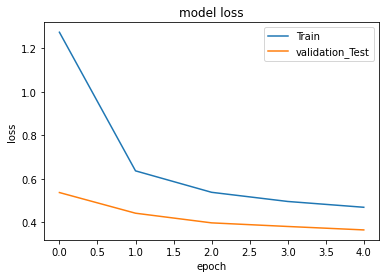

In [64]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','validation_Test'],loc=0)

Text(0.5, 0, 'epochs')

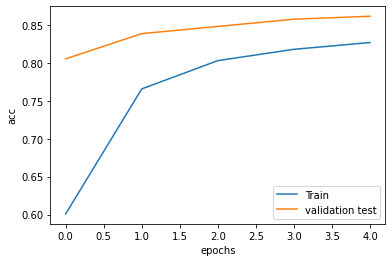

In [35]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Train','validation test'])
plt.ylabel('acc')
plt.xlabel('epochs')

In [36]:
prediction=model.predict(test_img)

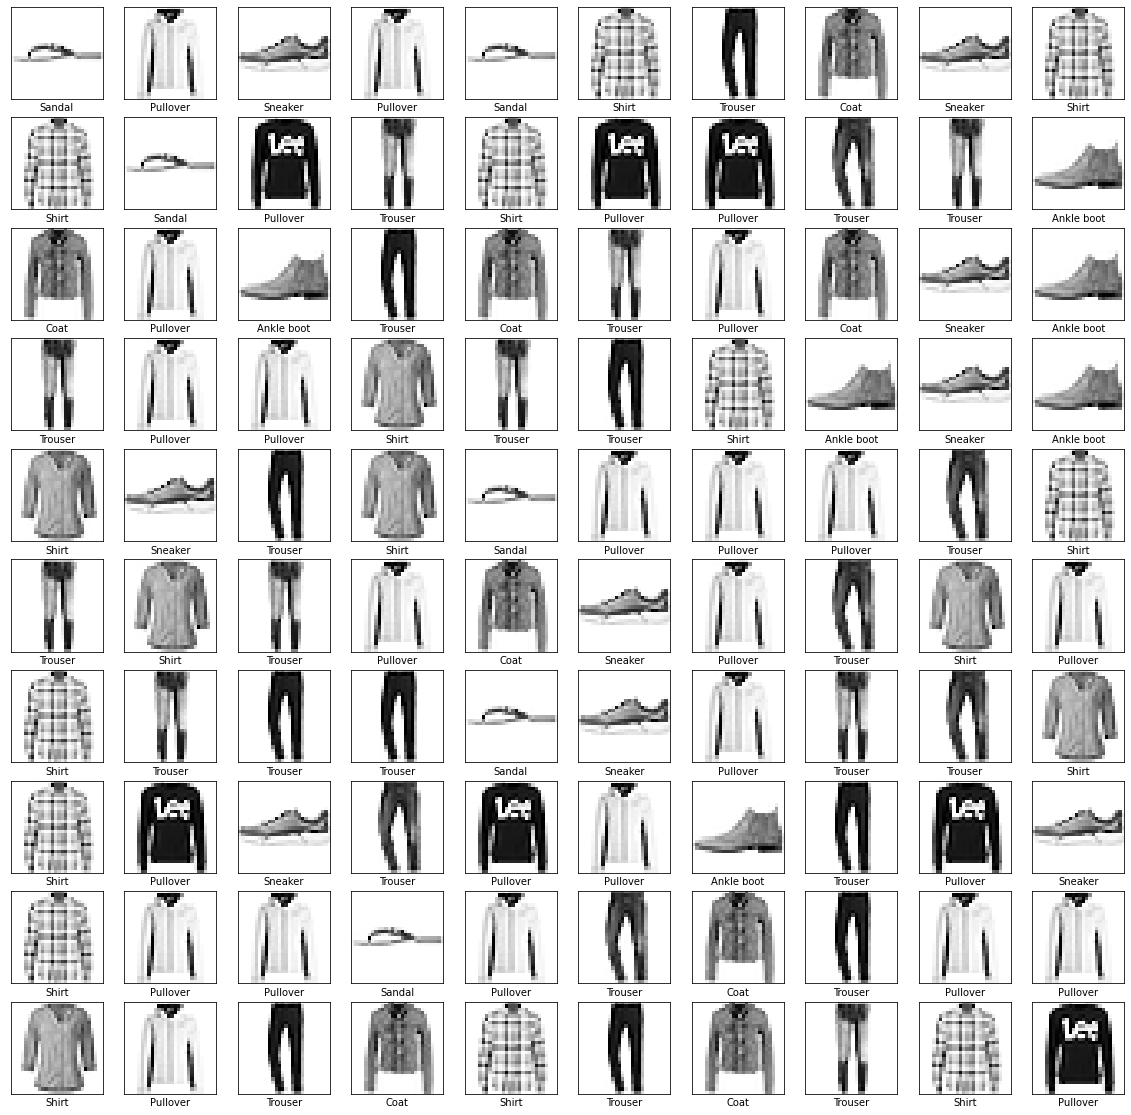

In [65]:
import random as ran
plt.figure(figsize=(20,20))
#임의의 100개 데이터 사진과 함께 데이터 출력 결과 확인을 하기
for i in range(100):
    plt.subplot(10,10,i+1)
    rand_num=ran.randint(0,10)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.reshape(test_img[rand_num],(28,28)),cmap='Greys')
    plt.xlabel(class_names[np.argmax(prediction[rand_num])])